<a href="https://colab.research.google.com/github/Frederico-Gribaudi/MVP_Frederico_Gribaudi_Sprint_analise_exploratoria/blob/main/Classifica%C3%A7%C3%A3o_personalidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Frederico Francesco Gribaudi Cardozo





# **1) Descrição do Problema**

O conjunto de dados escolhido é multivariado e consiste em resultados de testes psicológicos, que categoriza pessoas em três tipos distintos de personalidade: introvertido, extrovertido e ambivertido. O objetivo principal é classificar o tipo de personalidade com base em resultados de testes psicológicos considerando vinte e nove características.

## Hipóteses do Problema

As hipóteses traçadas são as seguintes:

- Existem características-chave, ou seja mais importantes que outras para a determinação da personalidade?

- A personalidade ambivertida seria apenas uma exclusão de valores altos em características-chave para a classificação de personalidade?

- A personalidade introvertida é mais facilmente separável das outras duas personalidades?

## Tipo de Problema

Este é um problema de **classificação supervisionada**. Dado um conjunto de características, o objetivo é prever a qual das três personalidades uma pessoa se encaixa.

## Seleção de Dados

O dataset escolhido estava listado como "trending dataset" no site kaggle, e tem sido usado por pessoas que estão aprendendo ou praticando *Machine Learning*. Link para o dataset:  [Introvert, Extrovert & Ambivert Classification](https://www.kaggle.com/datasets/miadul/introvert-extrovert-and-ambivert-classification/data)

## Atributos do Dataset

O dataset contém 20,000 amostras, com  quantidades de amostras similares de cada uma das três personalidades, **34%** de extrovertidos, **33%** de introvertidos e **33%** de ambivertidos.

Possui trinta atributos:

* **personality type**: tipo de personalidade
* **social energy**: energia social
* **alone time preference**: preferência por solidão
* **talkativeness**: gostar de falar
* **deep reflection**: reflexão profunda
* **group comfort**: confortável ao estar em grupo
* **party liking**: gostar de festejar
* **listening skill**: habilidade de escuta
* **empathy**: empatia
* **creativity**: criatividade
* **organization**: organização
* **leadership**: liderança
* **risk taking**: propensão ao risco
* **public speaking comfort**: confortável ao falar em público
* **curiosity**: curiosidade
* **routine preference**: preferência por rotina
* **excitement seeking**: busca por excitação
* **friendliness**: amigável
* **emotional stability**: estabilidade emocional
* **planning**: planejamento
* **spontaneity**: espontaneidade
* **adventurousness**: espírito aventureiro
* **reading habit**: hábito de leitura
* **sports interest**: interesse por esportes
* **online social usage**: uso de redes sociais
* **travel desire**: desejo de viajar
* **gadget usage**: uso de dispositivos eletrônicos
* **work style collaborative**: estilo colaborativo de trabalho
* **decision speed**: velocidade na tomada de decisões
* **stress handling**: habilidade de lidar com o estresse

Exceto por **peronality type** que é uma variável categórica, todas as colunas tem valores númericos variando entre 0 e 10 baseado no resultado de testes psicológicos.

# **2) Importação das Bibliotecas Necessárias e Carga de Dados**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


In [2]:
# URL do dataset
url = 'https://raw.githubusercontent.com/Frederico-Gribaudi/MVP_Frederico_Gribaudi_Sprint_analise_exploratoria/refs/heads/main/personality_synthetic_dataset.csv'

# Carregando o DataFrame
df = pd.read_csv(url)

# visualização das primeiras linhas
df.head()

,personality_type,social_energy,alone_time_preference,talkativeness,deep_reflection,group_comfort,party_liking,listening_skill,empathy,creativity,...,spontaneity,adventurousness,reading_habit,sports_interest,online_social_usage,travel_desire,gadget_usage,work_style_collaborative,decision_speed,stress_handling
0,Extrovert,6.794295,3.854670,8.725446,2.515151,7.097368,8.588762,6.774799,6.430132,6.142968,...,4.853313,8.257134,5.270555,10.000000,9.154296,4.816422,9.191711,8.313590,8.032376,7.176905
1,Ambivert,6.378988,5.731157,7.029529,7.274493,4.111199,3.258248,5.550909,3.958179,6.149457,...,6.067201,6.289347,5.753165,5.334303,4.683781,4.725666,5.956141,5.890619,3.158988,3.423577
2,Ambivert,7.459421,6.322263,3.922269,4.622261,5.343276,7.452152,9.483990,6.127654,7.032017,...,5.524244,9.238784,5.250405,3.153540,5.000338,6.139166,6.033048,5.807500,4.571003,5.647480
3,Extrovert,6.159626,3.097837,6.019093,1.965440,7.837140,10.000000,9.436733,8.949684,8.923875,...,4.327018,8.489791,5.312617,8.379936,7.601946,6.370056,5.410145,6.671781,6.600233,5.870088
4,Introvert,5.568462,6.986722,3.913240,9.926161,1.650483,0.362298,7.470387,6.756837,9.507803,...,5.187689,3.167217,7.060235,2.333388,7.771569,5.534336,5.704598,5.832968,5.813099,3.758084


In [3]:
# Tradução dos nomes das colunas para o português
novos_nomes = {
    'personality_type': 'tipo_de_personalidade',
    'social_energy': 'energia_social',
    'alone_time_preference': 'preferencia_por_solidao',
    'talkativeness': 'gostar_de_falar',
    'deep_reflection': 'reflexao_profunda',
    'group_comfort': 'confortavel_ao_estar_em_grupo',
    'party_liking': 'gostar_de_festejar',
    'listening_skill': 'habilidade_de_escuta',
    'empathy': 'empatia',
    'creativity': 'criatividade',
    'organization': 'organizacao',
    'leadership': 'lideranca',
    'risk_taking': 'propensao_ao_risco',
    'public_speaking_comfort': 'confortavel_ao_falar_em_publico',
    'curiosity': 'curiosidade',
    'routine_preference': 'preferencia_por_rotina',
    'excitement_seeking': 'busca_por_excitacao',
    'friendliness': 'amigavel',
    'emotional_stability': 'estabilidade_emocional',
    'planning': 'planejamento',
    'spontaneity': 'espontaneidade',
    'adventurousness': 'espirito_aventureiro',
    'reading_habit': 'habito_de_leitura',
    'sports_interest': 'interesse_por_esportes',
    'online_social_usage': 'uso_de_redes_sociais',
    'travel_desire': 'desejo_de_viajar',
    'gadget_usage': 'uso_de_dispositivos_eletronicos',
    'work_style_collaborative': 'estilo_colaborativo_de_trabalho',
    'decision_speed': 'velocidade_na_tomada_de_decisoes',
    'stress_handling': 'habilidade_de_lidar_com_o_estresse'
}

# Renomeando as colunas
df.rename(columns=novos_nomes, inplace=True)

# Visualizando as novas colunas
print("Novos nomes das colunas:")
print(df.columns.tolist())

# Traduzindo os valores da coluna 'tipo_de_personalidade'
df['tipo_de_personalidade'] = df['tipo_de_personalidade'].replace({
    'Introvert': 'introvertido',
    'Extrovert': 'extrovertido',
    'Ambivert': 'ambivertido'
})


Novos nomes das colunas:
['tipo_de_personalidade', 'energia_social', 'preferencia_por_solidao', 'gostar_de_falar', 'reflexao_profunda', 'confortavel_ao_estar_em_grupo', 'gostar_de_festejar', 'habilidade_de_escuta', 'empatia', 'criatividade', 'organizacao', 'lideranca', 'propensao_ao_risco', 'confortavel_ao_falar_em_publico', 'curiosidade', 'preferencia_por_rotina', 'busca_por_excitacao', 'amigavel', 'estabilidade_emocional', 'planejamento', 'espontaneidade', 'espirito_aventureiro', 'habito_de_leitura', 'interesse_por_esportes', 'uso_de_redes_sociais', 'desejo_de_viajar', 'uso_de_dispositivos_eletronicos', 'estilo_colaborativo_de_trabalho', 'velocidade_na_tomada_de_decisoes', 'habilidade_de_lidar_com_o_estresse']


In [4]:
# visualização das primeiras linhas
df.head(10)

,tipo_de_personalidade,energia_social,preferencia_por_solidao,gostar_de_falar,reflexao_profunda,confortavel_ao_estar_em_grupo,gostar_de_festejar,habilidade_de_escuta,empatia,criatividade,...,espontaneidade,espirito_aventureiro,habito_de_leitura,interesse_por_esportes,uso_de_redes_sociais,desejo_de_viajar,uso_de_dispositivos_eletronicos,estilo_colaborativo_de_trabalho,velocidade_na_tomada_de_decisoes,habilidade_de_lidar_com_o_estresse
0,extrovertido,6.794295,3.854670,8.725446,2.515151,7.097368,8.588762,6.774799,6.430132,6.142968,...,4.853313,8.257134,5.270555,10.000000,9.154296,4.816422,9.191711,8.313590,8.032376,7.176905
1,ambivertido,6.378988,5.731157,7.029529,7.274493,4.111199,3.258248,5.550909,3.958179,6.149457,...,6.067201,6.289347,5.753165,5.334303,4.683781,4.725666,5.956141,5.890619,3.158988,3.423577
2,ambivertido,7.459421,6.322263,3.922269,4.622261,5.343276,7.452152,9.483990,6.127654,7.032017,...,5.524244,9.238784,5.250405,3.153540,5.000338,6.139166,6.033048,5.807500,4.571003,5.647480
3,extrovertido,6.159626,3.097837,6.019093,1.965440,7.837140,10.000000,9.436733,8.949684,8.923875,...,4.327018,8.489791,5.312617,8.379936,7.601946,6.370056,5.410145,6.671781,6.600233,5.870088
4,introvertido,5.568462,6.986722,3.913240,9.926161,1.650483,0.362298,7.470387,6.756837,9.507803,...,5.187689,3.167217,7.060235,2.333388,7.771569,5.534336,5.704598,5.832968,5.813099,3.758084
5,introvertido,2.807173,6.326097,2.770085,5.617670,4.752116,0.302630,7.137657,5.399156,4.564805,...,3.888344,1.868406,9.188567,4.817574,3.427446,4.674632,4.027299,3.048724,2.774809,4.560962
6,introvertido,1.537468,7.605496,4.294666,9.166947,3.085335,1.042874,10.000000,5.899131,5.423302,...,7.906636,3.173683,9.458013,2.272047,5.218917,2.745851,4.056359,5.695608,3.230287,6.761266
7,ambivertido,6.636632,4.350586,7.131511,5.455061,2.530413,3.081656,5.177344,5.692996,3.951603,...,3.643867,7.601721,5.803109,5.024010,7.029383,6.990230,7.147859,4.680890,5.107637,7.246737
8,extrovertido,7.330318,2.820421,5.224400,5.053459,7.969032,9.106934,6.717555,7.061661,7.591541,...,4.459566,6.996722,5.980063,9.638288,5.509409,7.513645,8.788241,9.300327,8.086807,5.784908
9,ambivertido,5.377395,4.762184,4.244447,6.399885,4.781680,6.074592,10.000000,5.601565,4.927993,...,7.586472,5.513111,5.950501,2.328848,5.644438,6.251067,3.539273,5.698559,4.079389,6.609341


In [5]:
# visualização das últimas linhas
df.tail(10)

,tipo_de_personalidade,energia_social,preferencia_por_solidao,gostar_de_falar,reflexao_profunda,confortavel_ao_estar_em_grupo,gostar_de_festejar,habilidade_de_escuta,empatia,criatividade,...,espontaneidade,espirito_aventureiro,habito_de_leitura,interesse_por_esportes,uso_de_redes_sociais,desejo_de_viajar,uso_de_dispositivos_eletronicos,estilo_colaborativo_de_trabalho,velocidade_na_tomada_de_decisoes,habilidade_de_lidar_com_o_estresse
19990,extrovertido,8.102639,4.936379,9.580971,4.126549,6.350055,7.071409,4.670796,5.810679,3.961426,...,6.878814,5.574323,5.738097,3.631943,7.339986,5.924529,8.103198,7.748880,4.824774,6.089649
19991,ambivertido,5.250918,4.461787,5.953458,3.751218,5.297386,1.601640,9.748382,5.622223,4.525821,...,6.508603,4.274182,4.130920,8.532600,5.500215,5.653765,6.823472,6.208961,3.673498,3.856171
19992,introvertido,2.601940,8.589375,3.055787,7.537710,4.915021,4.430060,6.370154,9.000249,5.151677,...,5.974863,5.038454,9.182229,5.867759,3.756668,2.908530,2.469546,6.360303,1.877201,7.522244
19993,extrovertido,8.338994,5.608843,9.105338,4.657886,6.368701,7.016968,5.555118,4.619253,7.014191,...,6.745272,9.605230,2.555031,7.315834,8.413087,5.786300,8.029673,8.879529,7.353383,7.061337
19994,ambivertido,6.297109,6.625004,5.269047,7.098544,6.734609,6.541744,6.612903,7.659161,7.026331,...,5.445954,5.447236,6.942709,8.272175,6.236847,4.484729,6.205859,4.139596,8.119065,7.613383
19995,ambivertido,3.783857,4.345803,8.220063,6.297798,5.162622,5.702266,5.518356,3.420139,5.811565,...,8.521256,4.355973,6.454815,2.557365,6.949292,4.176390,5.649897,5.665498,5.252077,4.297520
19996,introvertido,2.621406,8.152097,2.954341,8.791467,2.670252,2.931244,5.855202,5.044124,6.244061,...,4.818308,2.631298,10.000000,3.697801,3.217559,3.638815,5.177155,5.106628,0.982214,5.873321
19997,introvertido,0.039689,8.277160,5.728101,7.790080,3.427897,0.708457,7.099321,5.784592,5.400400,...,3.318511,4.071008,9.974147,2.954407,5.427296,6.270830,3.793430,5.009167,3.810962,5.678412
19998,extrovertido,7.756725,3.956191,8.906972,3.793775,7.608467,6.292705,6.824980,5.653421,7.347820,...,7.156525,8.148780,3.840900,6.093418,7.814507,8.428745,8.736932,8.060841,8.161087,5.941793
19999,introvertido,3.225794,8.058594,0.000000,10.000000,6.363376,0.242722,9.307219,7.621912,5.919581,...,5.097344,2.720616,7.344312,5.566736,6.350940,2.997643,5.991222,3.964673,1.967942,5.810435


Checando as primeiras e as últimas 10 entradas, tudo indica que o dataset foi corretamente carregado em um dataframe.

# **3) Análise de Dados**

## Total e Tipo das Instâncias

O dataset possui **20,000** instâncias (observações), com **6,570** instâncias para introvertido, **6,857** instâncias para extrovertido e **6,573** instâncias para ambivertido. Todas as características psicológicas são de tipo numérico (float), exceto pelo atributo 'personality type' que é categórico.

In [6]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 20000

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   tipo_de_personalidade               20000 non-null  object 
 1   energia_social                      20000 non-null  float64
 2   preferencia_por_solidao             20000 non-null  float64
 3   gostar_de_falar                     20000 non-null  float64
 4   reflexao_profunda                   20000 non-null  float64
 5   confortavel_ao_estar_em_grupo       20000 non-null  float64
 6   gostar_de_festejar                  20000 non-null  float64
 7   habilidade_de_escuta                20000 non-null  float64
 8   empatia                             20000 non-null  float64
 9   criatividade                        20000 non-null  float64
 10  organizacao                         20000 non-null 

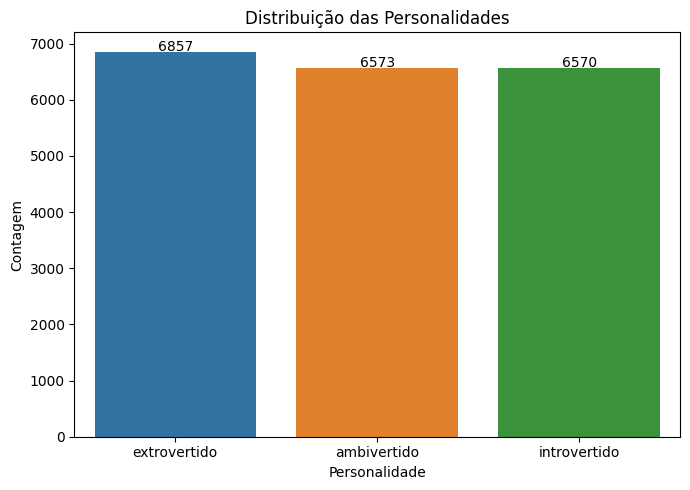

In [7]:
# Criação do gráfico
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='tipo_de_personalidade', hue='tipo_de_personalidade', data=df, legend=False)

# Adicionando os valores no topo de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,  # posição horizontal (centro da barra)
        height + 5,                      # altura acima da barra
        int(height),
        ha='center'
    )

# Personalização dos eixos e título
plt.title('Distribuição das Personalidades')
plt.xlabel('Personalidade')
plt.ylabel('Contagem')
plt.tight_layout()
plt.show()

O gráfico de barras mostra que cada personalidade apresenta valores similares, calculando podemos ver que:

*   Extrovertidos = 6857/20000 = **34,285%**
*   Ambivertidos = 6573/20000 = **32,865%**
*   Introvertidos = 6570/20000 = **32,850%**

Confirmando que o dataset é balanceado em termos de classes.

## Estatísticas Descritivas

As estatíticas das colunas numéricas podem ser extraídas da seguinte forma:

In [8]:
# estatísticas descritivas básicas do dataset
df.describe()

,energia_social,preferencia_por_solidao,gostar_de_falar,reflexao_profunda,confortavel_ao_estar_em_grupo,gostar_de_festejar,habilidade_de_escuta,empatia,criatividade,organizacao,...,espontaneidade,espirito_aventureiro,habito_de_leitura,interesse_por_esportes,uso_de_redes_sociais,desejo_de_viajar,uso_de_dispositivos_eletronicos,estilo_colaborativo_de_trabalho,velocidade_na_tomada_de_decisoes,habilidade_de_lidar_com_o_estresse
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,5.509190,5.454690,5.525955,5.958689,6.014381,5.040063,6.964450,6.483220,5.996018,5.973280,...,5.495280,5.033716,5.940795,5.492490,6.498574,5.508935,6.006893,6.501986,5.516168,5.981982
std,2.468526,2.493731,2.488006,2.162427,2.178551,2.810563,1.647944,1.534911,1.496690,1.697589,...,1.922809,2.203344,2.170924,1.931728,1.889493,1.932081,1.683523,1.889782,1.944257,1.490327
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.308044,0.804853,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.590989,3.509578,3.595866,4.382619,4.415537,2.727584,5.812701,5.448486,4.992667,4.805742,...,4.156240,3.429189,4.325104,4.127064,5.157772,4.155375,4.867919,5.160594,4.149764,4.973047
50%,5.540706,5.464038,5.574786,5.972345,6.051489,5.053005,6.989855,6.481365,6.003320,5.986871,...,5.499699,5.045021,5.962857,5.508153,6.528960,5.498701,6.006740,6.525735,5.528102,5.978661
75%,7.424123,7.416314,7.472371,7.598495,7.668598,7.363676,8.155574,7.521483,7.013412,7.142282,...,6.853083,6.656162,7.564929,6.861487,7.885414,6.877156,7.160525,7.878841,6.905844,6.991311
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


Como esperado, verifica-se que os valores dos atributos realmente variam entre 0 e 10, além disso verifica-se que os valores das médias estão em sua maioria próximos a 5, indicando que o dataset realmente é balanceado em relação aos tipos de personalidade.

## Análise do Desvio Padrão

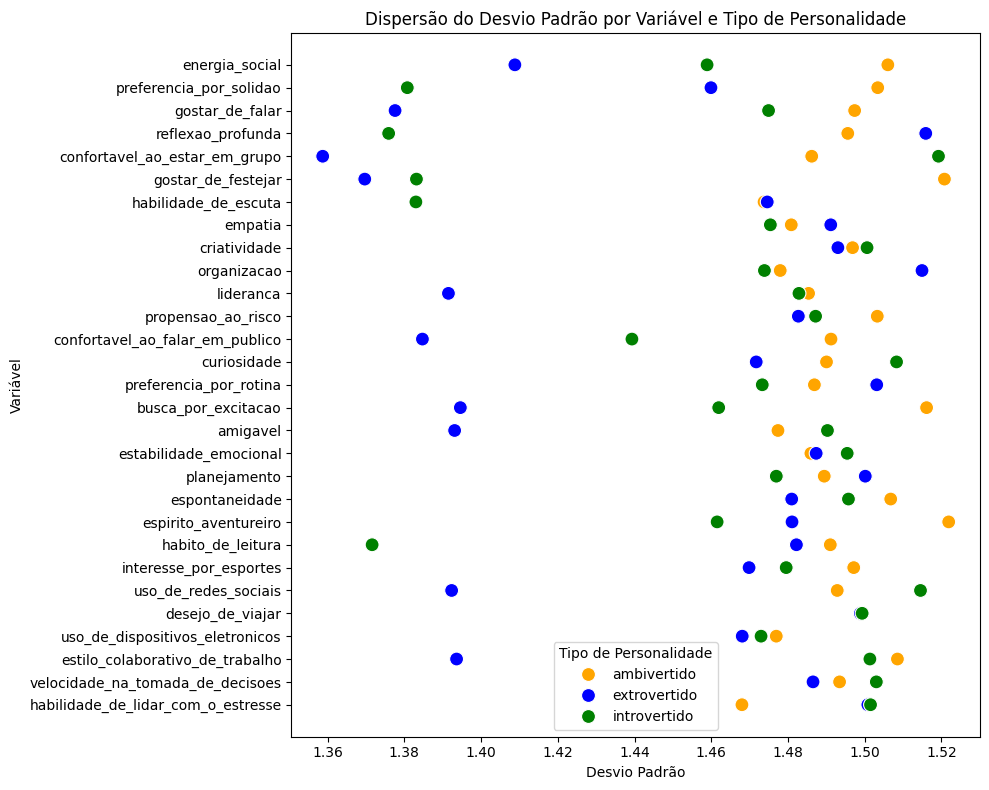

In [9]:
# Agrupando por tipo de personalidade e calculando desvio padrão
std_por_tipo = df.groupby('tipo_de_personalidade').std(numeric_only=True)

# Transformando para formato longo
std_long = std_por_tipo.T.reset_index().melt(id_vars='index', var_name='tipo_de_personalidade', value_name='std')
std_long.rename(columns={'index': 'variable'}, inplace=True)

# Dicionário de cores
cores = {
    'introvertido': 'green',
    'extrovertido': 'blue',
    'ambivertido': 'orange'
}

# Scatter plot com seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=std_long,
    x='std',
    y='variable',
    hue='tipo_de_personalidade',
    palette=cores,
    s=100  # tamanho dos pontos
)

plt.title('Dispersão do Desvio Padrão por Variável e Tipo de Personalidade')
plt.xlabel('Desvio Padrão')
plt.ylabel('Variável')
plt.legend(title='Tipo de Personalidade')
plt.tight_layout()
plt.show()


Pode-se ver no gráfico que os valores de desvio padrão são relativamente baixos, menores do que 1.52, indicando assim que não deve haver uma grande dispersão dos valores em relação a média para nenhuma das personalidades.

## Análise da Média

In [10]:
# média dos atributos numéricos do dataset
df.describe().loc['mean']

,mean
energia_social,5.509190
preferencia_por_solidao,5.454690
gostar_de_falar,5.525955
reflexao_profunda,5.958689
confortavel_ao_estar_em_grupo,6.014381
gostar_de_festejar,5.040063
habilidade_de_escuta,6.964450
empatia,6.483220
criatividade,5.996018
organizacao,5.973280


Como o dataset é balanceado o valor da média de todas as personalidades não auxilia muito na análise, visto que todos os valores convergem para 5 ou 6.


In [11]:
# Agrupando as personalidades antes de calcular a média
df.groupby('tipo_de_personalidade').mean(numeric_only=True)

,energia_social,preferencia_por_solidao,gostar_de_falar,reflexao_profunda,confortavel_ao_estar_em_grupo,gostar_de_festejar,habilidade_de_escuta,empatia,criatividade,organizacao,...,espontaneidade,espirito_aventureiro,habito_de_leitura,interesse_por_esportes,uso_de_redes_sociais,desejo_de_viajar,uso_de_dispositivos_eletronicos,estilo_colaborativo_de_trabalho,velocidade_na_tomada_de_decisoes,habilidade_de_lidar_com_o_estresse
tipo_de_personalidade,,,,,,,,,,,,,,,,,,,,,
ambivertido,5.487189,5.499532,5.505193,6.010245,6.002363,4.983452,7.001478,6.493101,5.995431,5.988027,...,5.460516,5.019460,5.998644,5.465656,6.483922,5.481572,5.990354,6.482269,5.508123,5.991131
extrovertido,7.899779,3.008493,7.951506,4.033245,7.957310,7.961159,5.999934,6.003546,5.999392,4.992914,...,6.957620,6.981690,3.982649,6.985701,7.929156,6.978522,6.989731,7.933724,7.006239,5.963589
introvertido,3.036183,7.962882,3.015219,7.916663,3.998603,2.048000,7.934054,6.973961,5.993083,6.981717,...,4.003841,3.014912,7.926603,3.960896,5.020158,4.002527,4.997667,5.027430,3.969053,5.992026


Na tabela acima verifica-se que o agrupamento por tipo de personalidade, antes do cálculo da média pode trazer uma separação interessante dos valores, podendo assim indicar possíveis características-chave.

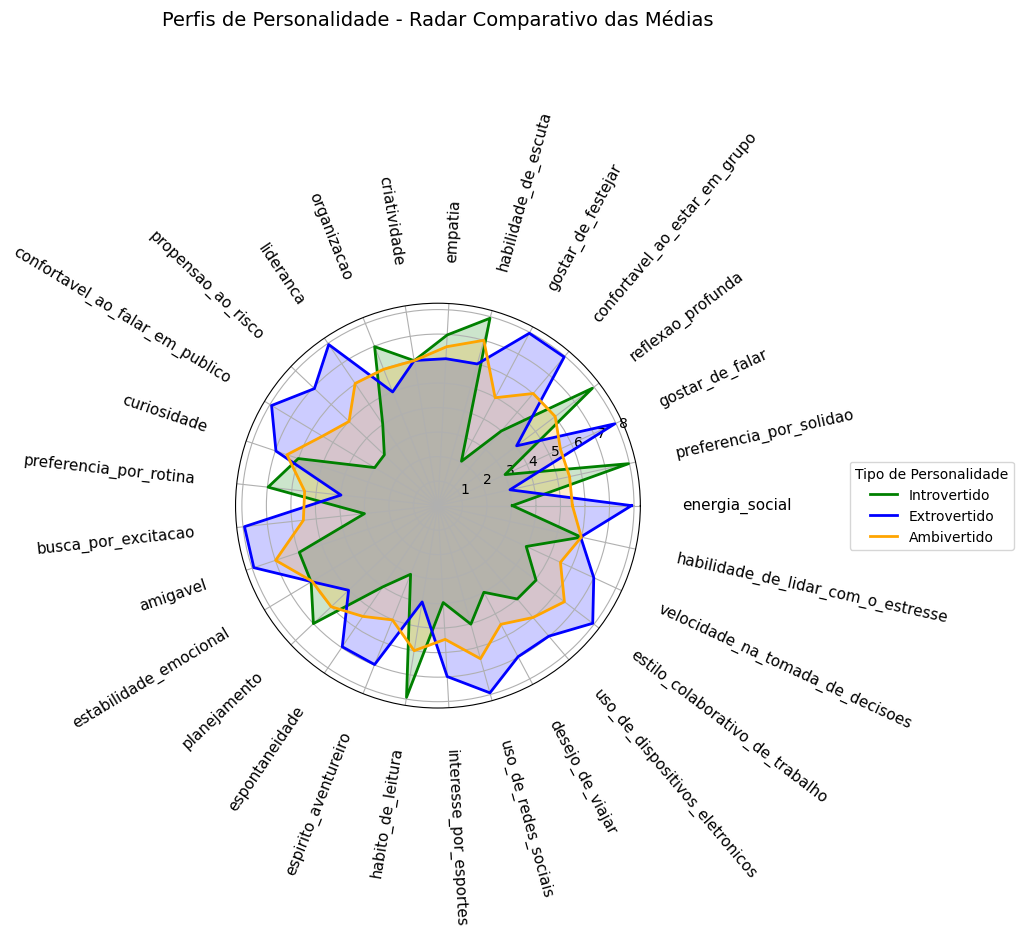

In [12]:
# Calculando a média de cada variável por tipo de personalidade
mean_por_tipo = df.groupby('tipo_de_personalidade').mean(numeric_only=True)

# Lista de variáveis
variaveis = mean_por_tipo.columns.tolist()
num_variaveis = len(variaveis)

# Ângulos para os eixos do radar
angles = np.linspace(0, 2 * np.pi, num_variaveis, endpoint=False).tolist()
angles += angles[:1]  # Fecha o círculo

# Função para fechar os valores do gráfico
def valores_para_radar(valores):
    return valores.tolist() + valores.tolist()[:1]

# Criação do gráfico
plt.figure(figsize=(12, 10))
ax = plt.subplot(111, polar=True)

# Configurar os eixos
ax.set_xticks(angles[:-1])
ax.set_xticklabels([])  # Oculta rótulos padrão

# Valor máximo do gráfico
valor_max = mean_por_tipo.to_numpy().max()
raio_texto = valor_max * 1.25  # distância dos rótulos

# Adicionar rótulos das variáveis com correção de rotação
for i, angle in enumerate(angles[:-1]):
    angle_deg = np.degrees(angle)

    if 90 < angle_deg < 270:
        rotation = angle_deg + 180
        alignment = 'right'
    else:
        rotation = angle_deg
        alignment = 'left'

    ax.text(
        angle,
        raio_texto,
        variaveis[i],
        fontsize=11,
        ha=alignment,
        va='center',
        rotation=rotation,
        rotation_mode='anchor'
    )

# Cores por tipo de personalidade
cores = {
    'introvertido': 'green',
    'extrovertido': 'blue',
    'ambivertido': 'orange'
}

# Adicionar os perfis ao radar
for tipo in ['introvertido', 'extrovertido', 'ambivertido']:
    valores = valores_para_radar(mean_por_tipo.loc[tipo])
    ax.plot(angles, valores, label=tipo.capitalize(), color=cores[tipo], linewidth=2)
    ax.fill(angles, valores, color=cores[tipo], alpha=0.2)

# Título e legenda
plt.title('Perfis de Personalidade - Radar Comparativo das Médias', size=14, pad=200)

plt.legend(
    loc='center left',
    bbox_to_anchor=(1.5, 0.5),
    frameon=True,
    title='Tipo de Personalidade'
)

# Layout ajustado para acomodar a legenda à direita
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()


Nesse gráfico verifica-se que os valores médios de algumas propriedades já aparentam ser bons indicativos para alguns tipos de personalidade, possivelmente características-chave, já possui valores muito altos para uma personalidade e baixos para a outra, como por exemplo:

* *preferência por solidão* >  **8** para introvertidos, **5.5** para ambivertidos e **3** para extrovertidos
* *hábito de leitura* > **8** para introvertidos, **6** para ambivertidos e **4** pra extrovertidos
* *reflexão profunda* > **8** para introvertidos, **6** para ambivertidos e **5** pra extrovertidos
* *gostar de festejar* > **2** para introvertidos, **5** para ambivertidos e **8** pra extrovertidos
* *confortável ao falar em público* > **3** para introvertidos, **5.5** para ambivertidos e **8** pra extrovertidos
* *confortável ao estar em grupo* > **4** para introvertidos, **6** para ambivertidos e **8** pra extrovertidos

Verifica-se também que ambivertidos tem num geral valores entre introvertidos e extrovertidos. Portanto esse tipo de personalidade deve ser representado pela falta de características-chave de introvertido e extrovertido.



## Histograma

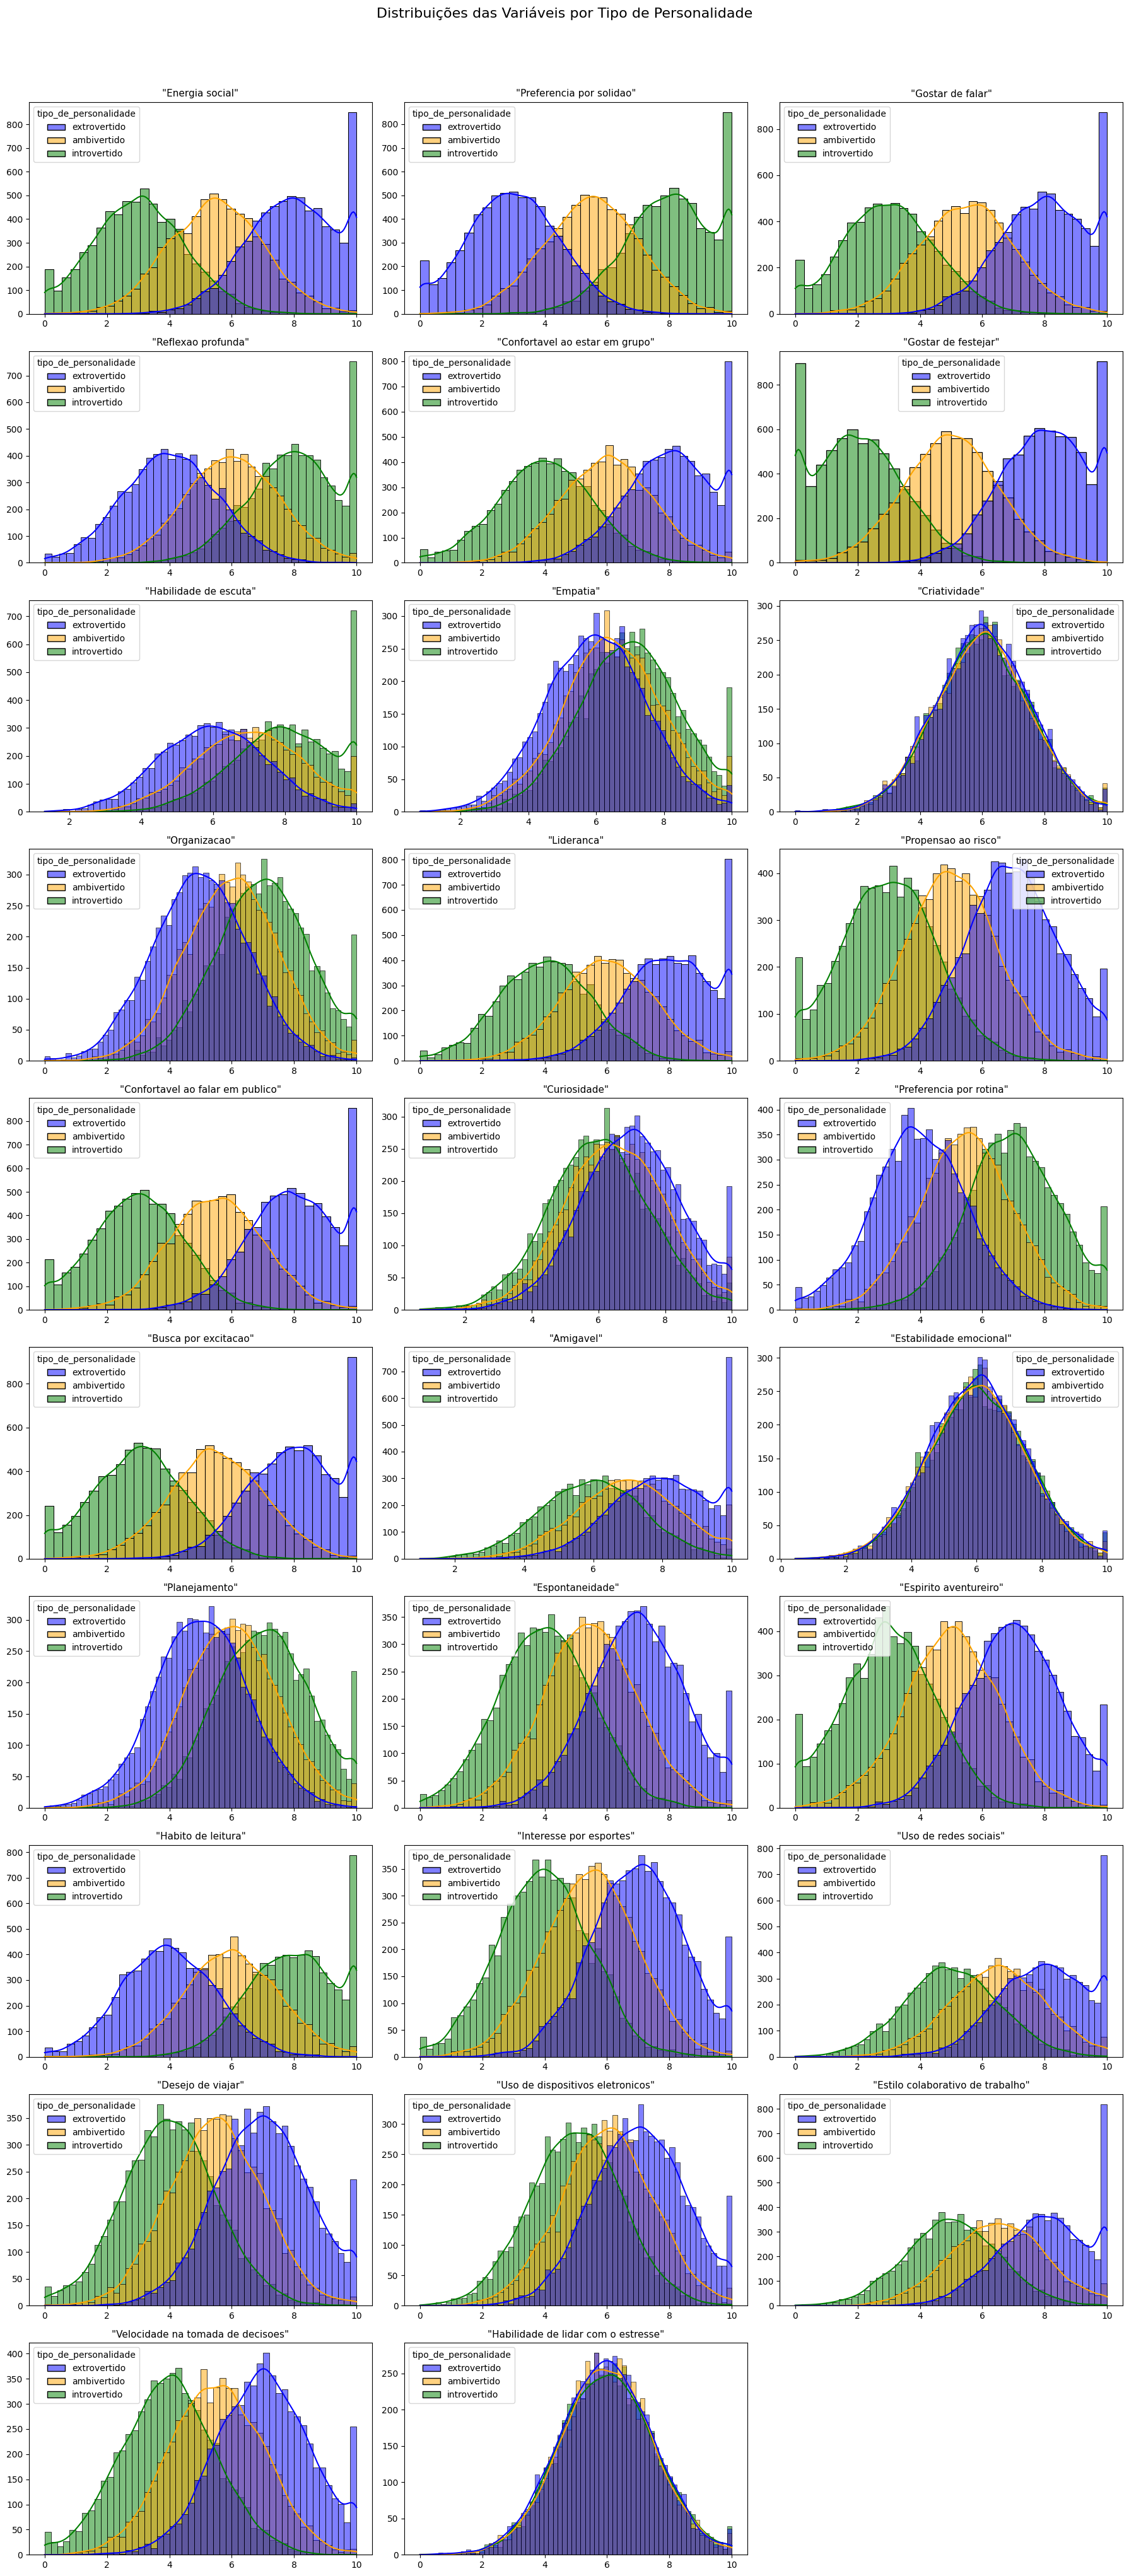

In [13]:
# Tipos e cores
tipos = ['introvertido', 'extrovertido', 'ambivertido']
cores = {
    'introvertido': 'green',
    'extrovertido': 'blue',
    'ambivertido': 'orange'
}

# Lista de variáveis numéricas
variaveis = df.select_dtypes(include='number').columns.tolist()
n = len(variaveis)

# Configurações de grid
cols = 3
rows = math.ceil(n / cols)

# Criando a grade de subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 4))
axes = axes.flatten()

for i, var in enumerate(variaveis):
    sns.histplot(
        data=df,
        x=var,
        hue='tipo_de_personalidade',
        kde=True,
        element='bars',
        stat='count',
        common_norm=False,
        palette=cores,
        ax=axes[i]
    )
    axes[i].set_title(f'"{var.replace("_", " ").capitalize()}"', fontsize=11)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Remove subplots vazios, se existirem
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Legenda geral
handles, labels = axes[0].get_legend_handles_labels()
plt.suptitle('Distribuições das Variáveis por Tipo de Personalidade', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


As curvas de densidade estimada (KDE) indicam que as distribuições são em sua grande maioria multimodais. As características que são mais claras as separações entre os diferentes tipos de personalidade para o grupo escolhido de características:
* “energia social”
* "preferência por solidão"
* “gostar de falar”
* "reflexão profunda"
* "confortável ao estar em grupo"
* "gostar de festejar"
* “liderança”
* “propensão ao risco”
* "confortável ao falar em público"
* “busca por excitação”
* “espírito aventureiro”
* “interesse por esportes”
* "hábito de leitura"

De forma análoga, nem todas tem uma separação tão boa entre os tipos de personalidade, logo podem ser descartadas como características-chave, por exemplo:

* "habilidade de lidar com o estresse"
* "estabilidade emocional"
* "curiosidade"
* "criatividade"
* "empatia"





## Boxplot


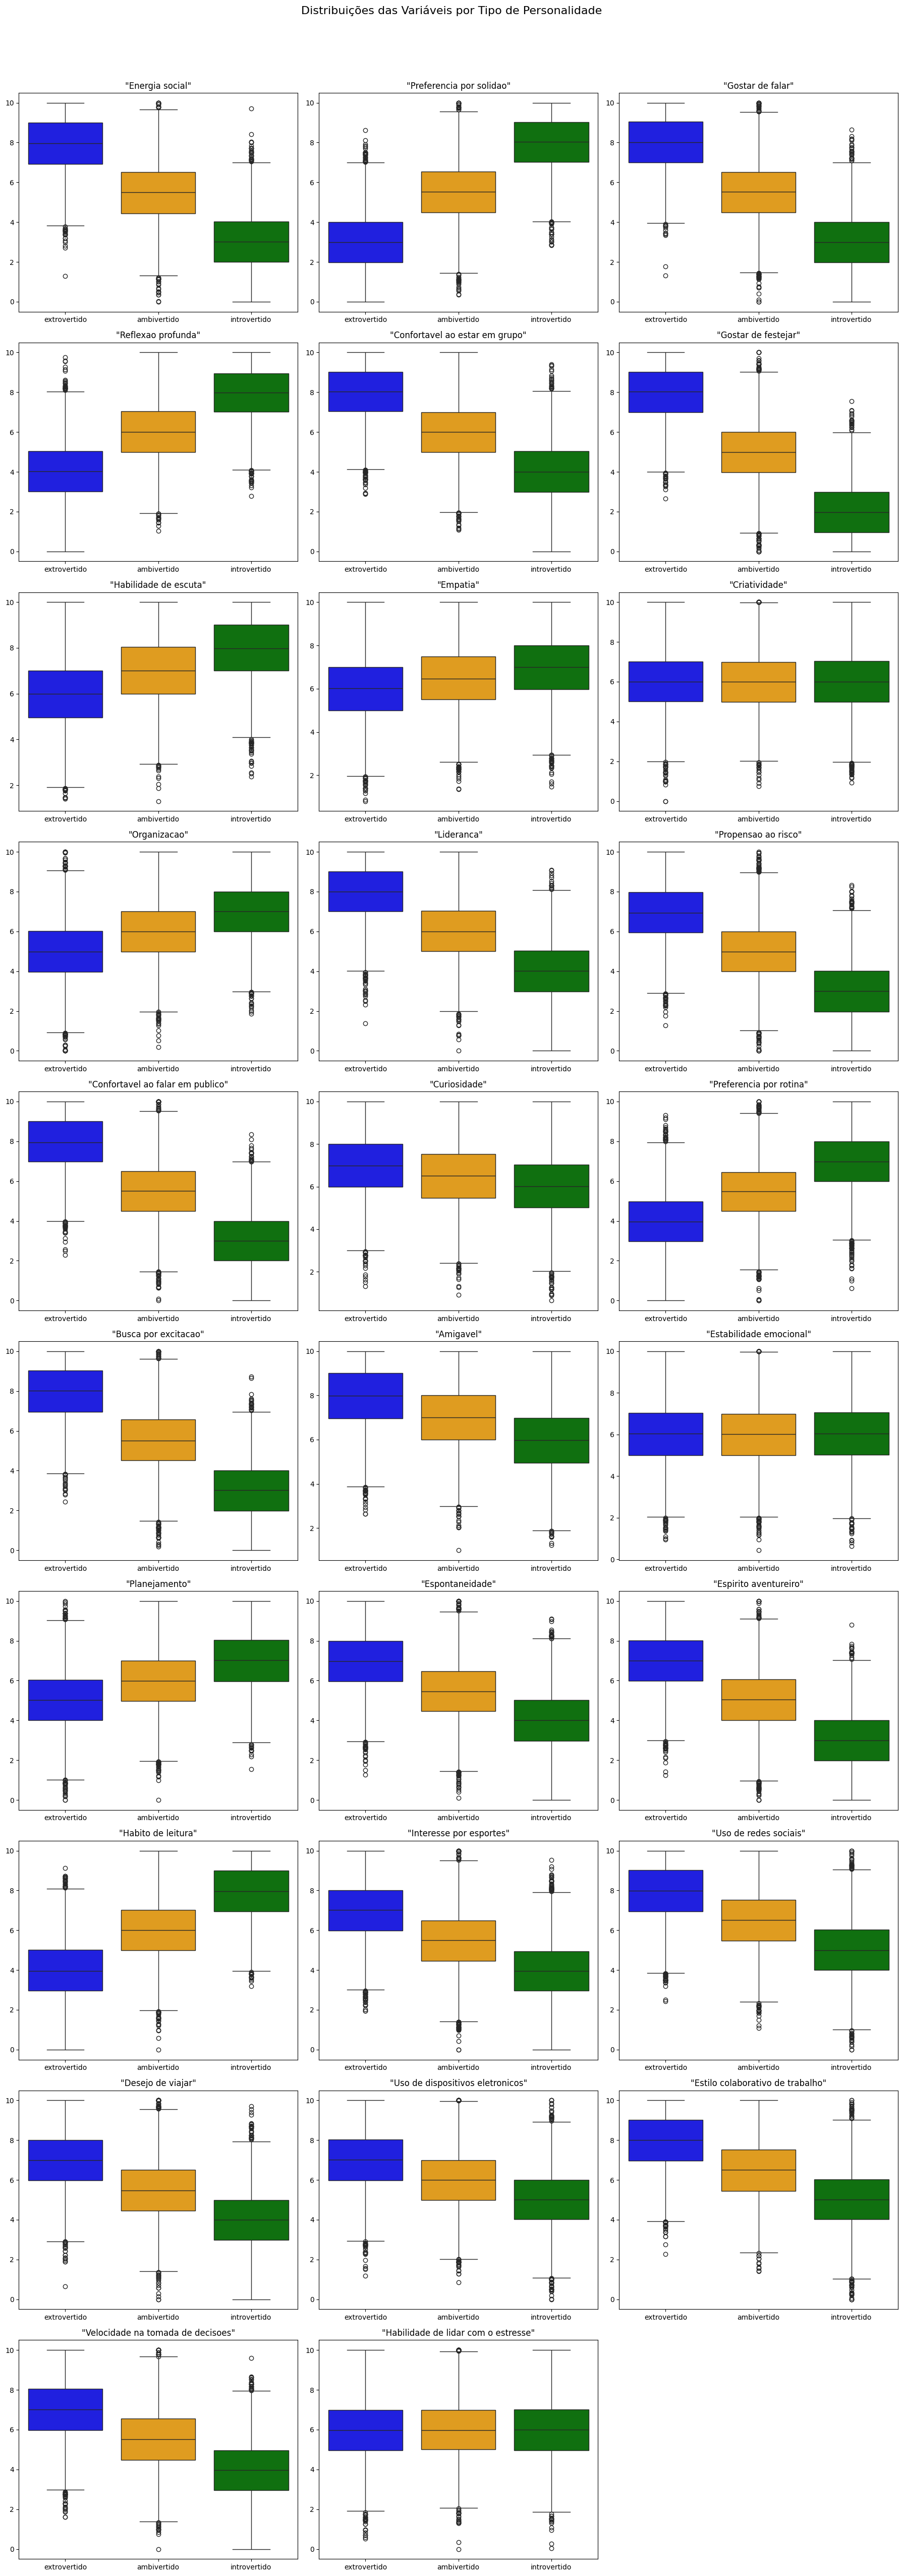

In [14]:
# Dicionário de cores
cores = {
    'introvertido': 'green',
    'extrovertido': 'blue',
    'ambivertido': 'orange'
}

# Lista de variáveis numéricas
variaveis = df.select_dtypes(include='number').columns.tolist()
n = len(variaveis)

# Definindo número de colunas e linhas para o grid
cols = 3
rows = math.ceil(n / cols)

# Criando os subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 5))
axes = axes.flatten()  # transforma em vetor para iterar

for i, var in enumerate(variaveis):
    sns.boxplot(
        data=df,
        x='tipo_de_personalidade',
        y=var,
        hue='tipo_de_personalidade',
        palette=cores,
        ax=axes[i],
        legend=False
    )
    axes[i].set_title(f'"{var.replace("_", " ").capitalize()}"', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Remove subplots vazios (caso o número de variáveis não seja múltiplo de cols)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Legenda geral
handles, labels = axes[0].get_legend_handles_labels()
plt.suptitle('Distribuições das Variáveis por Tipo de Personalidade', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


O boxplot das características mostra que nem todas tem uma separação tão boa entre os tipos de personalidade, logo podem ser descartadas como características-chave, por exemplo:

* "habilidade de lidar com o estresse"
* "estabilidade emocional"
* "curiosidade"
* "criatividade"
* "empatia"

Em contrapartida verifica-se que as seguintes características tem uma separação boa, considerando principalmente os valores de Q1 e Q3:

* "energia social"
* "preferência por solidão"
* "gostar de falar"
* "reflexão profunda"
* "confortável ao estar em grupo"
* "gostar de festejar"
* "liderança"
* "propensão ao risco"
* "confortável ao falar em público"
* "busca por excitação"
* “espírito aventureiro”
* "hábito de leitura"

Observa-se também que existem outliers em todos as características, o que indica que a classificação de tipo de personalidade depende de uma combinação de características e não apenas de uma predominante.


##  Matriz de Correlação

In [15]:
#Criando a matriz de correlação com todas as colunas
df.iloc[:, 1:30].corr()

,energia_social,preferencia_por_solidao,gostar_de_falar,reflexao_profunda,confortavel_ao_estar_em_grupo,gostar_de_festejar,habilidade_de_escuta,empatia,criatividade,organizacao,...,espontaneidade,espirito_aventureiro,habito_de_leitura,interesse_por_esportes,uso_de_redes_sociais,desejo_de_viajar,uso_de_dispositivos_eletronicos,estilo_colaborativo_de_trabalho,velocidade_na_tomada_de_decisoes,habilidade_de_lidar_com_o_estresse
energia_social,1.000000,-0.654726,0.657548,-0.595024,0.600819,0.696256,-0.391711,-0.210702,0.003439,-0.381587,...,0.516319,0.602295,-0.593950,0.515184,0.513714,0.505383,0.385225,0.505482,0.511334,-0.001252
preferencia_por_solidao,-0.654726,1.000000,-0.658442,0.598747,-0.606488,-0.702538,0.395045,0.209842,-0.000802,0.394110,...,-0.518212,-0.599756,0.606381,-0.523267,-0.512948,-0.519675,-0.398298,-0.509340,-0.526784,0.002054
gostar_de_falar,0.657548,-0.658442,1.000000,-0.595642,0.602341,0.699113,-0.396942,-0.206566,0.000732,-0.395587,...,0.510880,0.605093,-0.605081,0.523663,0.515386,0.511840,0.392204,0.513349,0.519035,-0.002229
reflexao_profunda,-0.595024,0.598747,-0.595642,1.000000,-0.545189,-0.635852,0.359396,0.189660,0.007595,0.359004,...,-0.459011,-0.543586,0.546049,-0.466185,-0.464402,-0.459070,-0.355450,-0.460659,-0.470996,0.002721
confortavel_ao_estar_em_grupo,0.600819,-0.606488,0.602341,-0.545189,1.000000,0.643558,-0.368349,-0.189119,0.008365,-0.359493,...,0.468917,0.545587,-0.555507,0.479155,0.466763,0.464743,0.362587,0.475264,0.475904,-0.005268
gostar_de_festejar,0.696256,-0.702538,0.699113,-0.635852,0.643558,1.000000,-0.413945,-0.221757,-0.000558,-0.415305,...,0.546361,0.635631,-0.640000,0.555671,0.539368,0.543858,0.414924,0.542184,0.549641,-0.012387
habilidade_de_escuta,-0.391711,0.395045,-0.396942,0.359396,-0.368349,-0.413945,1.000000,0.124744,-0.010125,0.224087,...,-0.306856,-0.351312,0.357068,-0.307160,-0.307916,-0.307071,-0.237891,-0.299893,-0.298741,-0.008031
empatia,-0.210702,0.209842,-0.206566,0.189660,-0.189119,-0.221757,0.124744,1.000000,-0.013908,0.134095,...,-0.168120,-0.187131,0.194420,-0.165008,-0.160410,-0.164178,-0.125468,-0.172934,-0.167321,-0.003407
criatividade,0.003439,-0.000802,0.000732,0.007595,0.008365,-0.000558,-0.010125,-0.013908,1.000000,0.003087,...,0.001773,0.003576,0.003189,-0.002150,-0.008520,0.002487,0.000121,0.003696,0.001499,-0.000754
organizacao,-0.381587,0.394110,-0.395587,0.359004,-0.359493,-0.415305,0.224087,0.134095,0.003087,1.000000,...,-0.303235,-0.353344,0.360127,-0.302548,-0.300454,-0.303142,-0.236453,-0.304044,-0.298850,0.016673


Como a quantidade de colunas é muito grande , a visualização em uma única matriz fica comprometida, portanto optou-se por fazer duas matrizes, uma filtrando valores de correlação moderada 0.5 ≤ |r| e outra filtrando correlação forte 0.7 ≤ |r|.

In [16]:
# Calculando a matriz de correlação completa
corr_matrix = df.iloc[:, 1:30].corr()

# Definindo um limite de corte
limite_moderada = 0.5
limite_forte = 0.7

# Criando uma máscara onde apenas correlações moderadas permanecem
filtro_moderada = corr_matrix.where((corr_matrix.abs() >= limite_moderada) & (corr_matrix.abs() < 1.0))

# Criando uma máscara onde apenas correlações fortes permanecem
filtro_forte = corr_matrix.where((corr_matrix.abs() >= limite_forte) & (corr_matrix.abs() < 1.0))

# Selecionando apenas as colunas que têm pelo menos uma correlação moderada a muito forte
cols_moderadas = filtro_moderada.columns[filtro_moderada.notna().any()].tolist()
cols_fortes = filtro_forte.columns[filtro_forte.notna().any()].tolist()


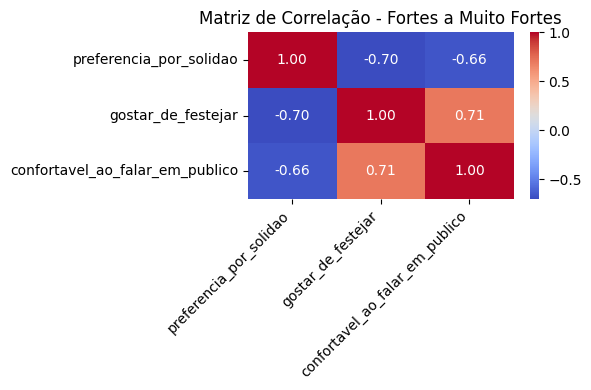

In [17]:
# Criação dos gráfico para correlações fortes a muito fortes
plt.figure(figsize=(6, 4))
sns.heatmap(df[cols_fortes].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação - Fortes a Muito Fortes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

O mapa de calor da 'Matriz de Correlação -  Fortes a Muito Fortes' revela as maiores correlações entre as características:

* positiva entre *gostar de festejar* e *confortável ao falar em público*, ou seja ambas tendem a ter valores parecidos, indicando que pertencem a mesma personalidade.

* negativa entre *preferência por solidão* ou *confortável ao falar em público* e *gostar de festejar*, logo quando uma tem valor alto, podemos excluir a personalidade da outra, por exemplo, valores altos de *gostar de festejar* implicam em valores baixos de *preferência por solidão*, nesse caso levando a uma personalidade extrovertida.


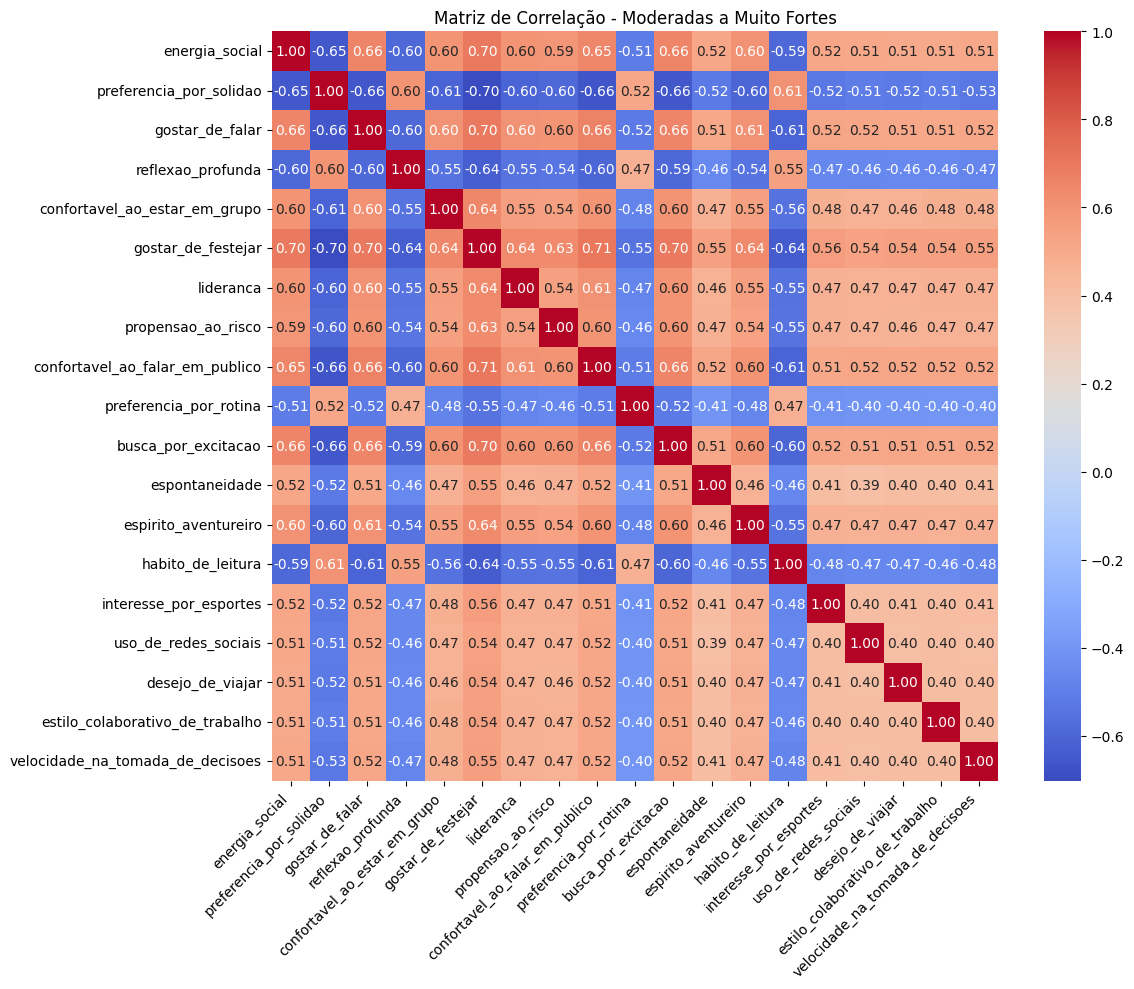

In [18]:
# Criação do gráfico para correlações moderadas a muito fortes
plt.figure(figsize=(12, 10))
sns.heatmap(df[cols_moderadas].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação - Moderadas a Muito Fortes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Observando a 'Matriz de Correlação - Moderadas a Muito Forte' podemos considerar algumas características com valores razoáveis para serem considerados característica-chave:
* "energia social"
* "gostar de falar"
* "reflexão profunda"
* "confortável ao estar em grupo"
* "liderança"
* "propensão ao risco"
* "preferência por rotina"
* "busca por excitação"
* "espontaneidade"
* "espírito aventureiro"
* "hábito de leitura"
* "interesse por esportes"
* "uso de redes sociais"
* "desejo de viajar"
* "estilo colaborativo de trabalho"
* "velocidade na tomada de decisões"


## Resumo da Análise Exploratória
Considerando os resultados obtidos em todos os gráficos, podemos ver que algumas características se destacam em todos eles, podendo então ser considerados características-chave:
* "preferência por solidão"
* "confortável ao falar em público"
* "gostar de festejar"
* "energia social"
* "gostar de falar"
* "reflexão profunda"
* "confortável ao estar em grupo"
* "liderança"
* "propensão ao risco"
* "busca por excitação"
* "espírito aventureiro"
* "hábito de leitura"

# **4) Pré-Processamento de Dados**

## Tratamento de Valores Nulos

In [19]:
# Verificando a presença de valores nulos no dataset original
print("Valores nulos no dataset:")
df.isnull().sum()

Valores nulos no dataset:


,0
tipo_de_personalidade,0
energia_social,0
preferencia_por_solidao,0
gostar_de_falar,0
reflexao_profunda,0
confortavel_ao_estar_em_grupo,0
gostar_de_festejar,0
habilidade_de_escuta,0
empatia,0
criatividade,0


Como podemos observar acima, não existem valores nulos, na etapa de análise vimos também que os valores estão dentro da faixa esperada, sem valores incoerentes ou errados, não havendo necessidade de tratamento.

## Ajustando as colunas

Como visto anteriormente, algumas características não apresentam separação entre as personalidades, portanto decidiu-se por removê-las.



In [20]:
# Removendo colunas que não serão usadas
df=df.drop(columns=["habilidade_de_lidar_com_o_estresse","estabilidade_emocional","curiosidade","criatividade","empatia"],errors='ignore')

## One Hot Encoding

In [21]:
# Padronização completa para evitar problemas com espaços nas strings
df['tipo_de_personalidade'] = df['tipo_de_personalidade'].astype(str).str.strip()

# definindo o transformador como one hot encoding
encoder = OneHotEncoder(sparse_output=False)

# transformando os dados
onehot = encoder.fit_transform(df[['tipo_de_personalidade']])

# criando um dataframe com os dados transformados
df_encoded = pd.DataFrame(onehot, columns=encoder.get_feature_names_out(['tipo_de_personalidade']))
print(df_encoded)

       tipo_de_personalidade_ambivertido  tipo_de_personalidade_extrovertido  \
0                                    0.0                                 1.0   
1                                    1.0                                 0.0   
2                                    1.0                                 0.0   
3                                    0.0                                 1.0   
4                                    0.0                                 0.0   
...                                  ...                                 ...   
19995                                1.0                                 0.0   
19996                                0.0                                 0.0   
19997                                0.0                                 0.0   
19998                                0.0                                 1.0   
19999                                0.0                                 0.0   

       tipo_de_personalidade_introverti

In [22]:
# concatenando em um único dataframe
df_final = pd.concat([df, df_encoded], axis=1)

Este dataset será usado futuramente para machine learning, portanto é necessário usar o one hot encoding para representar os valores de "extrovertido", "introvertido" e "ambivertido" em vetores numéricos.

## Normalização

Os valores do dataset variam entre 0 e 10, então optou-se por normalizar os dados.



In [23]:
# Separar features (X) e target (y)
X = df_final.drop('tipo_de_personalidade', axis=1)
y = df_final['tipo_de_personalidade']

In [24]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [25]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (14000, 27)
Dimensões de X_test: (6000, 27)
Dimensões de y_train: (14000,)
Dimensões de y_test: (6000,)


In [26]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

In [27]:
# Aprende min e max APENAS de X_train
scaler_norm.fit(X_train)
X_train_normalized = scaler_norm.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_normalized = scaler_norm.transform(X_test)

In [28]:
# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualização)
df_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)

In [29]:
print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
print(df_normalized.head())


Primeiras 5 linhas dos dados normalizados (treino):
   energia_social  preferencia_por_solidao  gostar_de_falar  \
0        0.837780                 0.243153         0.687312   
1        0.061781                 0.752573         0.377877   
2        0.429409                 0.354499         0.828957   
3        0.165608                 0.747072         0.420795   
4        0.600940                 0.553824         0.871221   

   reflexao_profunda  confortavel_ao_estar_em_grupo  gostar_de_festejar  \
0           0.496316                       1.000000            0.694732   
1           0.619883                       0.268440            0.274094   
2           0.690273                       0.668112            0.629743   
3           0.673985                       0.483177            0.248339   
4           0.189204                       0.453717            0.517896   

   habilidade_de_escuta  organizacao  lideranca  propensao_ao_risco  ...  \
0              0.494274     0.589526   0.

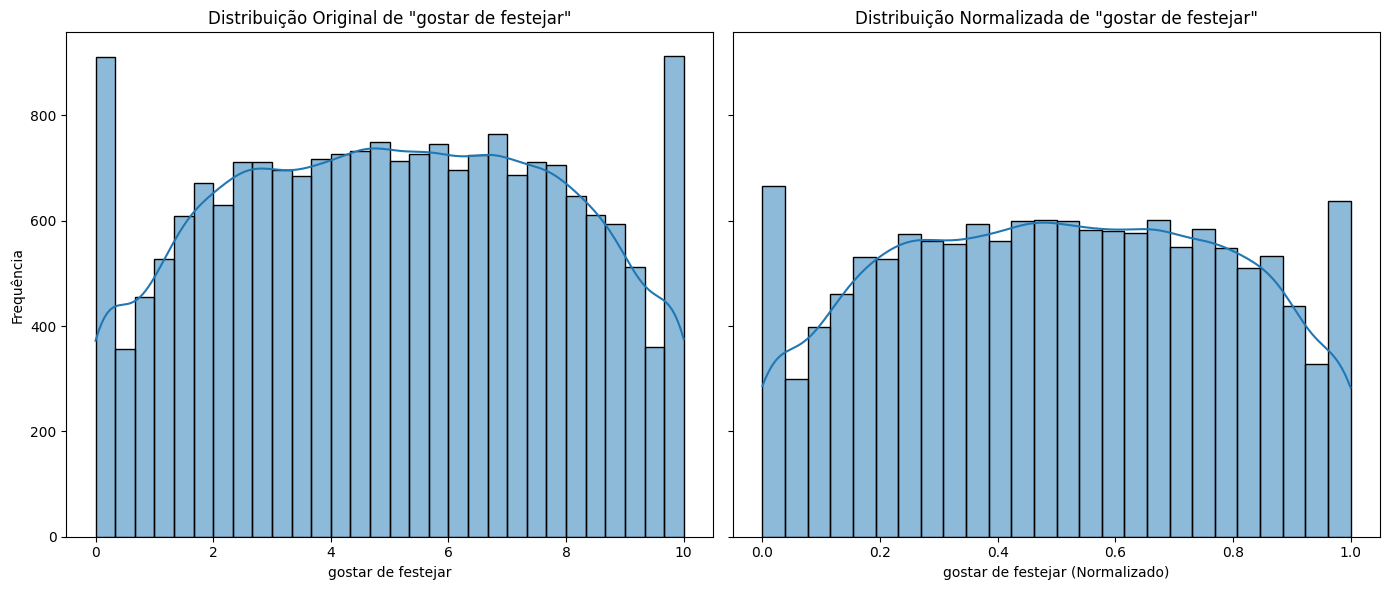

In [30]:
# Criação de dois subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Gráfico 1: valor original
sns.histplot(df['gostar_de_festejar'], kde=True, ax=axes[0])
axes[0].set_title('Distribuição Original de "gostar de festejar"')
axes[0].set_xlabel('gostar de festejar')
axes[0].set_ylabel('Frequência')

# Gráfico 2: valor normalizado
sns.histplot(df_normalized['gostar_de_festejar'], kde=True, ax=axes[1])
axes[1].set_title('Distribuição Normalizada de "gostar de festejar"')
axes[1].set_xlabel('gostar de festejar (Normalizado)')
axes[1].set_ylabel('')  # Remove label redundante

# Ajustando o layout para evitar sobreposição
plt.tight_layout()
plt.show()


O histograma de *gostar de festejar* após a normalização mostra que os valores foram escalados para o intervalo de 0 a 1, mantendo a forma da distribuição original.

# **5) Conclusão**

O dataset é completo, limpo e balanceado visto que não foram necessárias alterações nos dados, não haviam dados faltantes, os valores máximos e mínimos realmente estavam dentro das faixas informadas pelo site de origem.

As características numéricas bem definidas permitem uma clara separação entre os tipos de personalidade.

A análise exploratória revelou correlações importantes entre as características  e a eficácia de visualizações como histogramas, boxplots e matriz de correlação foram úteis para definir as características-chave para distinguir as personalidades.

As etapas de normalização foram utilizadas para preparar os dados para algoritmos de aprendizado de máquina, garantindo que o modelo possa aprender eficientemente com as relações presentes nos dados.

As três hipóteses levantadas foram validadas:

1.   *Existem características mais importantes que outras para a determinação da personalidade?*

Sim. O grupo de características-chave é:
* "preferência por solidão"
* "confortável ao falar em público"
* "gostar de festejar"
* "energia social"
* "gostar de falar"
* "reflexão profunda"
* "confortável ao estar em grupo"
* "liderança"
* "propensão ao risco"
* "busca por excitação"
* "espírito aventureiro"
* "hábito de leitura"

2.   *A personalidade ambivertida seria apenas uma exclusão de valores altos em características-chave para a classificação de personalidade?*

Sim, quando os valores das características-chave não representam a personalidade introvertida ou extrovertida a classificação encontrada era ambivertida.

3.   *A personalidade introvertida é mais facilmente separável das outras duas personalidades?*

Sim. Para ter uma classificação introvertida é necessário ter valores altos em menos características.